<a href="https://colab.research.google.com/github/Blackman9t/Machine_Learning/blob/master/coefficients_of_multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <font color='khaki'>Getting to understand Multiple Linear Regression better by walking through it's internal workings and computation.

[stattrek.com](https://stattrek.com/multiple-regression/regression-coefficients.aspx?Tutorial=reg)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Defining the scores table  like on the website

In [2]:
student_scores = pd.DataFrame({'Score':[100, 90, 80, 70, 60], 'IQ':[110, 120, 100, 90, 80,], 'Study_hours':[40, 30, 20, 0, 10]})

student_scores.index.name='Student'

student_scores.head()

,Score,IQ,Study_hours
Student,,,
0,100,110,40
1,90,120,30
2,80,100,20
3,70,90,0
4,60,80,10


## Defining Matrix $X$

In [3]:
X = student_scores.loc[:, ['IQ',"Study_hours"]]

ones = np.ones(len(student_scores), dtype=int)

X.insert(0, 'ones', ones)

X.head()

,ones,IQ,Study_hours
Student,,,
0,1,110,40
1,1,120,30
2,1,100,20
3,1,90,0
4,1,80,10


In [4]:
# Next we convert X to a Numpy array from a Data frame

X = X.values

X

array([[  1, 110,  40],
       [  1, 120,  30],
       [  1, 100,  20],
       [  1,  90,   0],
       [  1,  80,  10]])

## Defining $X'$ or X Transpose

In [5]:
X_tp = X.transpose()

X_tp

array([[  1,   1,   1,   1,   1],
       [110, 120, 100,  90,  80],
       [ 40,  30,  20,   0,  10]])

#### Print out the shape of X and X'.

In [6]:
print('X shape is',X.shape,'\nX-tanspose shape is',X_tp.shape)

X shape is (5, 3) 
X-tanspose shape is (3, 5)


## Post-multiply $X'$ by $X$... using matrix multiplication

In [7]:
X_tp_X = np.matmul(X_tp, X)

X_tp_X

array([[    5,   500,   100],
       [  500, 51000, 10800],
       [  100, 10800,  3000]])

Notice,  that so far we are getting exactly the same result as on the website [stattrek.com](https://stattrek.com/multiple-regression/regression-coefficients.aspx?Tutorial=reg)

## Next we define the inverse of $X'X$, just like in the website

In [8]:
from numpy.linalg import inv

inverse = inv(X_tp_X)

inverse

array([[ 2.02000000e+01, -2.33333333e-01,  1.66666667e-01],
       [-2.33333333e-01,  2.77777778e-03, -2.22222222e-03],
       [ 1.66666667e-01, -2.22222222e-03,  2.77777778e-03]])

In [9]:
# checking to make sure the same values as the website

print(inverse[0,:])
print(inverse[1,:])
print(inverse[2,:])

[20.2        -0.23333333  0.16666667]
[-0.23333333  0.00277778 -0.00222222]
[ 0.16666667 -0.00222222  0.00277778]


everything is perfect up to this point

In [10]:
X_tp.shape

(3, 5)

In [11]:
inverse.shape

(3, 3)

## Next we post-multiply $(X'X)^{-1}$ by $X'$ 

In [12]:
X_tp_inverse = np.matmul(inverse, X_tp)

X_tp_inverse

array([[ 1.20000000e+00, -2.80000000e+00,  2.00000000e-01,
        -8.00000000e-01,  3.20000000e+00],
       [-1.66666667e-02,  3.33333333e-02,  1.73472348e-17,
         1.66666667e-02, -3.33333333e-02],
       [ 3.33333333e-02, -1.66666667e-02, -1.73472348e-17,
        -3.33333333e-02,  1.66666667e-02]])

In [13]:
X_tp_inverse.shape

(3, 5)

## Next we define the $Y$ variable

In [14]:
Y = student_scores.Score.values

Y

array([100,  90,  80,  70,  60])

In [15]:
Y.shape

(5,)

## Calculating the slope or coefficients

<h2><font color='khaki'>$ b = (X'X)^{-1}X'Y $</h2>

## Finally we Post-multiply $(X'X)^{-1}X'$ by $Y$ to get the coefficients of the MLR model

In [16]:
coefficients = np.matmul(X_tp_inverse, Y)

coefficients

array([20. ,  0.5,  0.5])

## $y_{hat} = b0 + b1x1 + b2x2$

which now means

## $y_{hat} = 20 + 0.5x1 + 0.5x2$

which now means

## $y_{hat} = 20 + 0.5(IQ) + 0.5(Study-hours)$

# <font color='khaki'>Part Two

# Real World Data

### Let's extrapolate on our learnings and apply these concepts to real live data

Let's download the data set from Git-hub

In [0]:
# Let's import our Data set
data = "https://raw.githubusercontent.com/Blackman9t/Machine_Learning/master/Original_2000_2014_Fuel_Consumption_Ratings.csv"

# Next let's define additional usual representation of null values to help us select and deal with null data
missing_data = ['n/a','na','--','?']

In [18]:
fuel_df = pd.read_csv(data, na_values=missing_data)

fuel_df.head()

,MODEL_YEAR,MAKE,MODEL,VEHICLE_CLASS,ENGINE_SIZE(L),CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONSUMPTION_CITY(L/100km),HWY_(L/100km),COMB_(L/100km),COMB_(mpg),CO2_EMISSIONS(g/km)
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


let's explore the data 

In [19]:
# let's check the data types per column or attribute are correct
fuel_df.dtypes

MODEL_YEAR                          int64
MAKE                               object
MODEL                              object
VEHICLE_CLASS                      object
ENGINE_SIZE(L)                    float64
CYLINDERS                           int64
TRANSMISSION                       object
FUEL_TYPE                          object
FUEL_CONSUMPTION_CITY(L/100km)    float64
HWY_(L/100km)                     float64
COMB_(L/100km)                    float64
COMB_(mpg)                          int64
CO2_EMISSIONS(g/km)                 int64
dtype: object

In [20]:
# Let's confirm the shape of the data type
fuel_df.shape

(14343, 13)

In [21]:
# Let's check for missing values
fuel_df.isna().sum()

MODEL_YEAR                        0
MAKE                              0
MODEL                             0
VEHICLE_CLASS                     0
ENGINE_SIZE(L)                    0
CYLINDERS                         0
TRANSMISSION                      0
FUEL_TYPE                         0
FUEL_CONSUMPTION_CITY(L/100km)    0
HWY_(L/100km)                     0
COMB_(L/100km)                    0
COMB_(mpg)                        0
CO2_EMISSIONS(g/km)               0
dtype: int64

In [0]:
# Let's rename some column names for brevity
fuel_df.rename(columns={'FUEL_CONSUMPTION_CITY(L/100km)':'FUEL_CONS_CITY', 
                        'ENGINE_SIZE(L)':'ENGINE_SIZE',
                       'HWY_(L/100km)':'HWY_L100km',
                       'COMB_(L/100km)':'COMB_L100km',
                       'COMB_(mpg)':'COMB_MPG',
                       'CO2_EMISSIONS(g/km)':'CO2_EMISSIONS'},
                       inplace=True)

In [23]:
# Let's display the renamed data set
fuel_df.head()

,MODEL_YEAR,MAKE,MODEL,VEHICLE_CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONS_CITY,HWY_L100km,COMB_L100km,COMB_MPG,CO2_EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


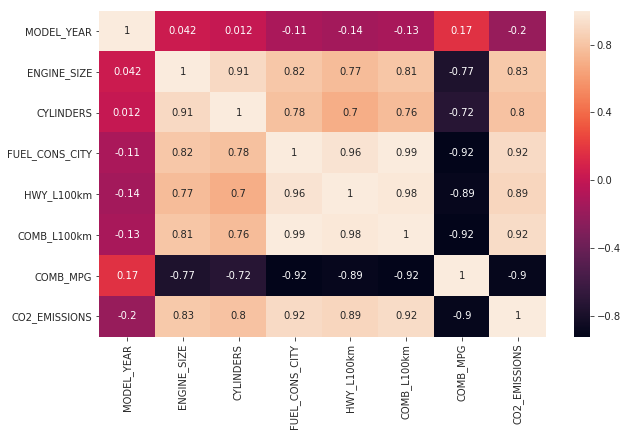

In [56]:
# Let's plot the correlation of the data set using a heatmap from seaborn library
corr_data = fuel_df.corr()

plt.figure(figsize=(10, 6))
sns.set_style('ticks')

sns.heatmap(corr_data, annot=True)

plt.show()

The Top correlated variables with CO2_EMISSIONS

In [65]:
corrs = {'Variable_Name':['Engine_Size','Cylinders','Fuel_Cons_City','Hwy_L/100','Comb_L/100','Comb_mpg'],
                'Corr_Amount':[round(fuel_df['ENGINE_SIZE'].corr(fuel_df.CO2_EMISSIONS),2),
                               round(fuel_df['CYLINDERS'].corr(fuel_df.CO2_EMISSIONS),2),
                               round(fuel_df['FUEL_CONS_CITY'].corr(fuel_df.CO2_EMISSIONS),2),
                               round(fuel_df['HWY_L100km'].corr(fuel_df.CO2_EMISSIONS),2),
                               round(fuel_df['COMB_L100km'].corr(fuel_df.CO2_EMISSIONS),2),
                               round(fuel_df['COMB_MPG'].corr(fuel_df.CO2_EMISSIONS),2)],
               'Description':['Strong Positive Correlation',
                              'Strong Positive Correlation',
                              'Strong Positive Correlation',
                              'Strong Positive Correlation',
                              'Strong Positive Correlation',
                              'Strong Negative Correlation']}

highest_corr = pd.DataFrame(highest_corr, index=[1,2,3,4,5,6])

highest_corr

,Variable_Name,Corr_Amount,Description
1,Engine_Size,0.83,Strong Positive Correlation
2,Cylinders,0.80,Strong Positive Correlation
3,Fuel_Cons_City,0.92,Strong Positive Correlation
4,Hwy_L/100,0.89,Strong Positive Correlation
5,Comb_L/100,0.92,Strong Positive Correlation
6,Comb_mpg,-0.90,Strong Negative Correlation


### Selecting our independent variables ($X$), an $m * n$ matrix and our dependent variable ($y$), a $m * 1$ vector

#### Let's first compile the data into training and testing data

In [25]:
data = fuel_df[['ENGINE_SIZE','CYLINDERS','FUEL_CONS_CITY','COMB_MPG', 'CO2_EMISSIONS']]

data.head()

,ENGINE_SIZE,CYLINDERS,FUEL_CONS_CITY,COMB_MPG,CO2_EMISSIONS
0,1.6,4,9.2,35,186
1,1.6,4,8.5,37,175
2,3.2,6,12.2,28,230
3,3.5,6,13.4,25,264
4,1.8,4,10.0,33,198


next we define the training data by making it 73% of the data selected at random 

In [26]:
training_data = data.sample(frac=0.73, random_state=47)

training_data.head(3)

,ENGINE_SIZE,CYLINDERS,FUEL_CONS_CITY,COMB_MPG,CO2_EMISSIONS
9054,3.0,6,11.9,28,232
14088,1.6,4,8.7,37,177
7891,3.5,6,11.6,29,223


next we define the remaining 27% of the data as testing data

In [0]:
# Now to find the index of the remaining 20% of the data to use as our random test data,
# we do the following to extract and cast it to a list:-
# convert the entire index to a set and convert the training data index to a set too, 
# find the diff between the two and cast that difference to a list. 

testing_index = list(set(data.index.values).difference(set(training_data.index.values)))

In [28]:
# And now we simply create a testing data set with only the index not in the training data set

testing_data = data.iloc[testing_index, :]

testing_data.head(3)

,ENGINE_SIZE,CYLINDERS,FUEL_CONS_CITY,COMB_MPG,CO2_EMISSIONS
3,3.5,6,13.4,25,264
8195,2.0,4,9.0,34,191
8197,3.5,6,12.2,27,237


Let's confirm the shapes of both training and testing data sets

In [29]:
print('Training data shape is',training_data.shape)
print('Testing data shape is',testing_data.shape)

Training data shape is (10470, 5)
Testing data shape is (3873, 5)


### Now let's define $X$ our $m * n$ matrix of the independent variables or features

#### First the training data $X-train$

In [30]:
# The training data for our model

X_train = training_data.iloc[:, :-1]
X_train.head(3)

,ENGINE_SIZE,CYLINDERS,FUEL_CONS_CITY,COMB_MPG
9054,3.0,6,11.9,28
14088,1.6,4,8.7,37
7891,3.5,6,11.6,29


next, adding a column of 1's as bias unit or intercept to $X-train$ to make $X-train$ a:  $1 + m * n$ matrix

In [31]:
ones = np.ones(len(X_train), dtype='int')

X_train.insert(0, 'ones', ones)

X_train.head(3)

,ones,ENGINE_SIZE,CYLINDERS,FUEL_CONS_CITY,COMB_MPG
9054,1,3.0,6,11.9,28
14088,1,1.6,4,8.7,37
7891,1,3.5,6,11.6,29


next convert $X-train$ to a numpy array

In [32]:
X_train = X_train.values

X_train

array([[ 1. ,  3. ,  6. , 11.9, 28. ],
       [ 1. ,  1.6,  4. ,  8.7, 37. ],
       [ 1. ,  3.5,  6. , 11.6, 29. ],
       ...,
       [ 1. ,  2.3,  6. , 12.2, 27. ],
       [ 1. ,  1.8,  4. , 10.1, 31. ],
       [ 1. ,  1.6,  4. ,  9.5, 34. ]])

#### Next we do the above steps to define the $X-test$ data we would use to test the model

In [33]:
X_test = testing_data.iloc[:, :-1]
X_test.head(3)

,ENGINE_SIZE,CYLINDERS,FUEL_CONS_CITY,COMB_MPG
3,3.5,6,13.4,25
8195,2.0,4,9.0,34
8197,3.5,6,12.2,27


In [34]:
# Adding a column of 1's as bias unit

ones = np.ones(len(X_test), dtype='int')

X_test.insert(0, 'ones', ones)

X_test.head(3)

,ones,ENGINE_SIZE,CYLINDERS,FUEL_CONS_CITY,COMB_MPG
3,1,3.5,6,13.4,25
8195,1,2.0,4,9.0,34
8197,1,3.5,6,12.2,27


In [35]:
# Now we convert X_test to an array

X_test = X_test.values

X_test

array([[ 1. ,  3.5,  6. , 13.4, 25. ],
       [ 1. ,  2. ,  4. ,  9. , 34. ],
       [ 1. ,  3.5,  6. , 12.2, 27. ],
       ...,
       [ 1. ,  2.4,  4. ,  9.8, 32. ],
       [ 1. ,  2.4,  4. , 10.3, 32. ],
       [ 1. ,  2.4,  4. ,  9.7, 34. ]])

### Now let's define $y$ our $m * 1$ column vector of the dependent variable or target

In [36]:
# first we define y_train

y_train = training_data.iloc[:, -1:].values

y_train

array([[232],
       [177],
       [223],
       ...,
       [237],
       [207],
       [189]])

In [37]:
# next we define y_test

y_test = testing_data.iloc[:, -1:].values

y_test

array([[264],
       [191],
       [237],
       ...,
       [202],
       [202],
       [191]])

## Model Development or Compiling-The-Model

next define $X'$ or $X$ transpose

In [38]:
X_trans = X_train.transpose()

X_trans

array([[ 1. ,  1. ,  1. , ...,  1. ,  1. ,  1. ],
       [ 3. ,  1.6,  3.5, ...,  2.3,  1.8,  1.6],
       [ 6. ,  4. ,  6. , ...,  6. ,  4. ,  4. ],
       [11.9,  8.7, 11.6, ..., 12.2, 10.1,  9.5],
       [28. , 37. , 29. , ..., 27. , 31. , 34. ]])

Next post-multiply $X'$ by $X$

In [39]:
X_trans_X = np.matmul(X_trans, X_train)

X_trans_X

array([[  10470.  ,   36336.7 ,   62725.  ,  135052.8 ,  286522.  ],
       [  36336.7 ,  143975.85,  239737.3 ,  508132.51,  915467.6 ],
       [  62725.  ,  239737.3 ,  409039.  ,  860567.7 , 1616006.  ],
       [ 135052.8 ,  508132.51,  860567.7 , 1871908.76, 3440852.4 ],
       [ 286522.  ,  915467.6 , 1616006.  , 3440852.4 , 8427362.  ]])

Let's print out their corresponding shapes

In [40]:
print('Shape of X is',X_train.shape)
print('Shape of X transpose is',X_trans.shape)
print('Shape of X transpose X is',X_trans_X.shape)

Shape of X is (10470, 5)
Shape of X transpose is (5, 10470)
Shape of X transpose X is (5, 5)


Next we define the inverse of $X'X$ written as $(X'X)^{-1}$ using the linear algebra library(linalg) from numpy

In [41]:
from numpy.linalg import inv

X_trans_X_inv = inv(X_trans_X)

print("Shape of inverse of X'X is",X_trans_X_inv.shape)
X_trans_X_inv

Shape of inverse of X'X is (5, 5)


array([[ 3.38337058e-02, -8.01293531e-05, -1.55797930e-06,
        -1.28516162e-03, -6.16583945e-04],
       [-8.01293531e-05,  3.76575963e-04, -1.88406928e-04,
        -2.42411229e-05,  7.84261804e-06],
       [-1.55797930e-06, -1.88406928e-04,  1.72088451e-04,
        -1.97154444e-05, -4.42976118e-06],
       [-1.28516162e-03, -2.42411229e-05, -1.97154444e-05,
         6.73073105e-05,  2.26268665e-05],
       [-6.16583945e-04,  7.84261804e-06, -4.42976118e-06,
         2.26268665e-05,  1.18409551e-05]])

Next we post-multiply  $(X'X)^{-1}$ by $X'$ 

In [42]:
X_trans_X_inv_X_trans = np.matmul(X_trans_X_inv, X_trans)

print("Shape of inverse of X'X by X' is",X_trans_X_inv_X_trans.shape)
X_trans_X_inv_X_trans

Shape of inverse of X'X by X' is (5, 10470)


array([[ 1.02619623e-03, -2.95245047e-04,  7.55096093e-04, ...,
         1.31332224e-03,  1.58900649e-03,  5.26377494e-04],
       [-1.49719089e-04, -1.51956426e-04,  5.36838477e-05, ...,
        -4.28437218e-04, -1.57634514e-04, -1.94877178e-04],
       [ 1.07104839e-04,  4.99192086e-05,  1.43862472e-05, ...,
         2.37504817e-04,  1.12147679e-05,  4.74361366e-05],
       [-4.16683948e-05,  1.99584706e-05, -5.13542830e-05, ...,
        -2.71342821e-05, -2.64207181e-05,  5.92371961e-06],
       [-1.88282036e-05,  1.32142768e-05, -9.85399940e-06, ...,
        -2.93709314e-05, -2.45853172e-05, -4.20709539e-06]])

## Model Training or Fitting-The-Model

Finally we find our coefficients by post-multiplying $(X'X)^{-1}X'$ by $y-train$

In [43]:
coefficients = np.matmul(X_trans_X_inv_X_trans, y_train)

print('Final shape of coefficients is',coefficients.shape)
coefficients

Final shape of coefficients is (5, 1)


array([[188.52046097],
       [  5.33277744],
       [  3.85299841],
       [  7.08266566],
       [ -2.66311109]])

### Thus our Multiple Linear Regression Model Ideal Parameters are:- 

In [44]:
intercept = coefficients[0]

b1 = coefficients[1]

b2 = coefficients[2]

b3 = coefficients[3]

b4 = coefficients[4]

print('Intercept or bias unit is:',intercept)
print('b1 or slope for ENGINE_SIZE variable is:',b1)
print('b2 or slope for CYLINDERS variable is:',b2)
print('b3 or slope for FUEL_CONS_CITY variable is:',b3)
print('b4 or slope for COMB_MPG variable is:',b4)

Intercept or bias unit is: [188.52046097]
b1 or slope for ENGINE_SIZE variable is: [5.33277744]
b2 or slope for CYLINDERS variable is: [3.85299841]
b3 or slope for FUEL_CONS_CITY variable is: [7.08266566]
b4 or slope for COMB_MPG variable is: [-2.66311109]


## Model Evaluation

#### Let's define a simple method for prediction

In [0]:
def predict(x):
    """ takes a row of test data and predicts it
    and returns only the float value of the observation"""
    x = list(x)
    
    x = x[0]*intercept + x[1]*b1 + x[2]*b2 + x[3]*b3 + x[4]*b4
    
    return x[0]  # returns the float of value of x

Next let's convert the test data to a Data frame so we can apply the predict method on it

In [46]:
X_eval = pd.DataFrame(X_test)

X_eval.head()

,0,1,2,3,4
0,1.0,3.5,6.0,13.4,25.0
1,1.0,2.0,4.0,9.0,34.0
2,1.0,3.5,6.0,12.2,27.0
3,1.0,1.8,4.0,9.4,34.0
4,1.0,6.1,8.0,16.0,21.0


Next let's apply the predict method and pass axis=1 so it's done along the columns<br>
Then we convert it to a numpy ID array using the .values and assign it all to y_hat.<br>
y_hat is then our model's prediction on the out-of-sample or test data set

In [0]:
y_hat = X_eval.apply(predict, axis=1).values

y_hat or our model prediction is now a numpy 1D array. This will be useful for plotting

In [48]:
y_hat

array([258.63311518, 187.79622351, 244.80769421, ..., 200.92168918,
       204.46302201, 194.88720045])

## Importing Metrics from Sklearn to evaluate the model

In [0]:
from sklearn.metrics import mean_squared_error, r2_score

Let's compute the Mean Squared Error

In [50]:
MSE = mean_squared_error(y_hat, y_test)
MSE

444.1983754997918

Lets find the RMSE which is the square root of the MSE

In [51]:
RMSE = MSE**0.5

RMSE

21.076014222328467

**Finding the RMSE as a percentage of the range of the target variable.
The lower the percentage the better the model**

First we find the range of the target variable

In [52]:
y_range = y_test.max() - y_test.min()
y_range

439

Next we compute the RMSE as a percent of the range, the lower the error percent, the better the model

In [53]:
error_margin = (RMSE / y_range) * 100

error_margin

4.800914401441565

Finally let's compute the  R2  score or coefficient of determination of our model prediction.<br>
This tells us how confident the model is on each prediction<br>
The highest value is 1... So the closer to 1, the better the score

In [54]:
r2_score(y_test, y_hat)  # pass in the true values first, then the predicted values.

0.8724117885849141

## Visualization

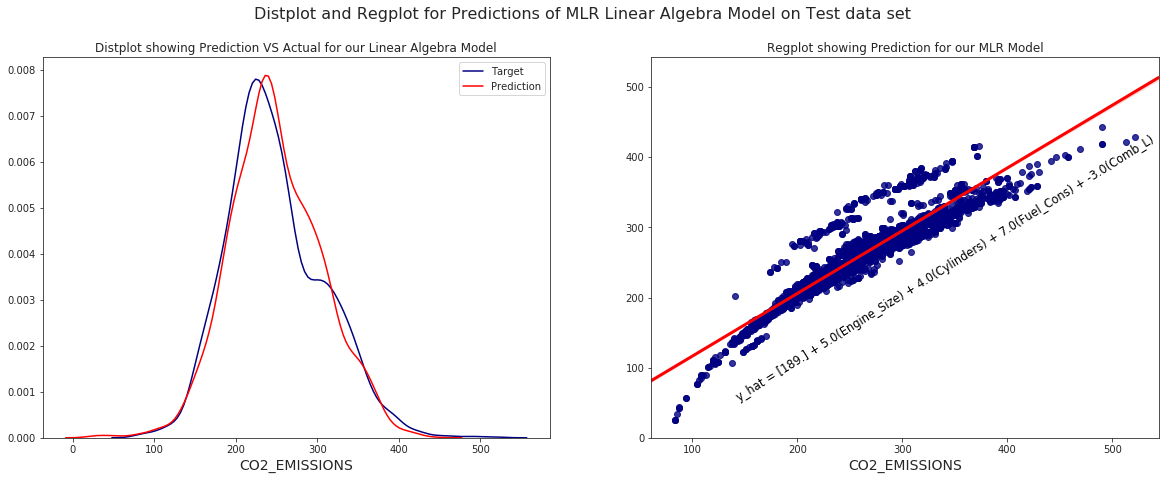

In [55]:
fig = plt.figure(figsize=(20, 7))
plt.suptitle('Distplot and Regplot for Predictions of MLR Linear Algebra Model on Test data set', fontsize=16)

ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

# plotting the Distplot
sns.distplot(y_test.squeeze(), hist=False, label='Target', color='navy', ax=ax)
sns.distplot(y_hat.squeeze(), hist=False, label='Prediction', color='red', ax=ax)
ax.set_xlabel('CO2_EMISSIONS', fontsize=14)
ax.set_title('Distplot showing Prediction VS Actual for our Linear Algebra Model')

# plotting the Regplot
sns.regplot(y_test.squeeze(), y_hat, scatter_kws={"color": "navy"}, line_kws={"color": "red" ,'linewidth':3}, ax=ax1)
ax1.annotate('y_hat = {} + {}(Engine_Size) + {}(Cylinders) + {}(Fuel_Cons) + {}(Comb_L)'.format(np.round(intercept), 
                                                             np.round(b1[0]), 
                                                             np.round(b2[0]), 
                                                             np.round(b3[0]),
                                                             np.round(b4[0])), 
                                                             xy=(140,420), 
                                                             rotation=32, 
                                                             fontsize=11.5, color='black')
ax1.set_xlabel('CO2_EMISSIONS', fontsize=14)
ax1.set_title('Regplot showing Prediction for our MLR Model')



plt.show()

## Summary

We have seen how Multiple Linear regression works step by step using Simple Linear Algebra.<br>

We built a MLR Model from scratch by first determining correlated variables, selecting four of them  and shaping them into a 2D array.<br>
Then using pandas library to split the data into training and testing sets.<br>
Then training the model with the tarining data set using the Matrix Multiplication,<br>
And using the model to make predictions on the test data set that is not yet known to the model(out of sample data set)<br>
Finally evaluating the model using MSE, RMSE and $R^2$ score.

Our Model performed quite good on the out-of-sample data set.<br>
With an error_margin of only 4.8% of the target variable range and a coefficient of determination of 0.87 out of 1.0